In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
import numpy as np
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from IPython.display import Image
from tensorflow.keras.models import load_model

In [2]:
from itertools import cycle
#from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
#from tensorflow.keras.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [64]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=0.5, decay = 0.000001)

In [46]:
train_path = 'D:/MScCS/thesis/Dataset/new/train'
valid_path = 'D:/MScCS/thesis/Dataset/new/test'

In [5]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [47]:
# useful for getting number of output classes
folders = glob('D:/MScCS/thesis/Dataset/new/train/*')

In [48]:
#layers
x = Flatten()(resnet.output)

In [31]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [32]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [65]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range= 15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [51]:
training_set = train_datagen.flow_from_directory('D:/MScCS/thesis/Dataset/new/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 800 images belonging to 4 classes.


In [52]:
test_set = test_datagen.flow_from_directory('D:/MScCS/thesis/Dataset/new/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 200 images belonging to 4 classes.


In [72]:
itr = test_datagen.flow_from_directory(
'D:/MScCS/thesis/Dataset/new/test',
target_size=(224,224),
batch_size=8,
class_mode='categorical')

#X, y = itr.next()
x_test, y_test = itr.next()

n_classes = 4
lw = 2

Found 200 images belonging to 4 classes.


In [73]:
def plot_roc_curve():
    #roc curve plot

    y_score = model.predict(x_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
    for i, color in zip(range(n_classes), colors):
        if(i == 0):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of cocci (area = {1:0.2f})".format(i, roc_auc[i]),
            )
        if(i == 1):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of healthy (area = {1:0.2f})".format(i, roc_auc[i]),
            )
        if(i == 2):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of ncd (area = {1:0.2f})".format(i, roc_auc[i]),
            )
        if(i == 3):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of salmo (area = {1:0.2f})".format(i, roc_auc[i]),
            )
    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic to multiclass")
    plt.legend(loc="lower right")
    plt.show()


In [55]:
def plot_loss_acc():
    # plotting the loss
    plt.plot(r.history['loss'], label='train loss')
    plt.plot(r.history['val_loss'], label='val loss')
    plt.legend()
    plt.ylim(-0.05, 1.1)
    plt.show()

    # plotting the accuracy
    plt.plot(r.history['accuracy'], label='train accuracy')
    plt.plot(r.history['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.ylim(-0.05, 1.1)
    plt.show()

In [66]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
100/100 [==============================] - 41s 381ms/step - loss: 1.0167 - accuracy: 0.5750 - val_loss: 1.0339 - val_accuracy: 0.5300
Epoch 2/10
100/100 [==============================] - 35s 345ms/step - loss: 0.9505 - accuracy: 0.5775 - val_loss: 1.0347 - val_accuracy: 0.6000
Epoch 3/10
100/100 [==============================] - 34s 337ms/step - loss: 0.8670 - accuracy: 0.6325 - val_loss: 0.8037 - val_accuracy: 0.6500
Epoch 4/10
100/100 [==============================] - 34s 336ms/step - loss: 0.8798 - accuracy: 0.6413 - val_loss: 0.7959 - val_accuracy: 0.6750
Epoch 5/10
100/100 [==============================] - 33s 334ms/step - loss: 0.9018 - accuracy: 0.6350 - val_loss: 0.8903 - val_accuracy: 0.5750
Epoch 6/10
100/100 [==============================] - 34s 336ms/step - loss: 0.8262 - accuracy: 0.6687 - val_loss: 0.8806 - val_accuracy: 0.6650
Epoch 7/10
100/100 [==============================] - 34s 341ms/step - loss: 0.8222 - accuracy: 0.6637 - val_loss: 0.8885 - val_ac

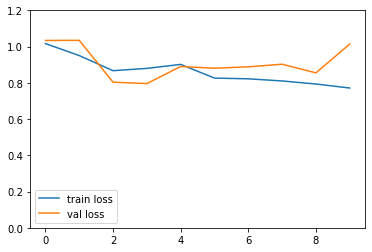

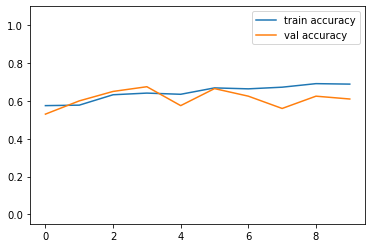

In [67]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylim(0.0, 1.2)
plt.show()

    # plotting the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.ylim(-0.05, 1.1)
plt.show()


1/1 [==============================] - 0s 28ms/step


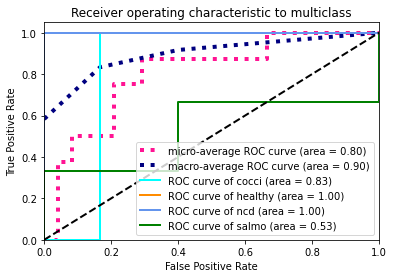

In [74]:
plot_roc_curve()
model.save('./models/resnet50_10.h5')

In [75]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
100/100 [==============================] - 34s 335ms/step - loss: 0.7924 - accuracy: 0.6862 - val_loss: 0.7670 - val_accuracy: 0.7100
Epoch 2/15
100/100 [==============================] - 34s 335ms/step - loss: 0.7161 - accuracy: 0.7312 - val_loss: 0.8072 - val_accuracy: 0.6300
Epoch 3/15
100/100 [==============================] - 33s 334ms/step - loss: 0.7751 - accuracy: 0.7050 - val_loss: 0.6787 - val_accuracy: 0.7700
Epoch 4/15
100/100 [==============================] - 33s 335ms/step - loss: 0.7534 - accuracy: 0.7050 - val_loss: 0.7061 - val_accuracy: 0.7100
Epoch 5/15
100/100 [==============================] - 33s 334ms/step - loss: 0.7033 - accuracy: 0.7225 - val_loss: 0.8181 - val_accuracy: 0.6500
Epoch 6/15
100/100 [==============================] - 33s 335ms/step - loss: 0.7315 - accuracy: 0.7138 - val_loss: 0.6332 - val_accuracy: 0.7850
Epoch 7/15
100/100 [==============================] - 35s 345ms/step - loss: 0.6978 - accuracy: 0.7312 - val_loss: 0.6120 - val_ac

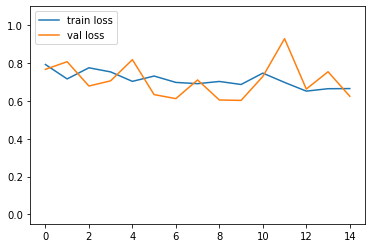

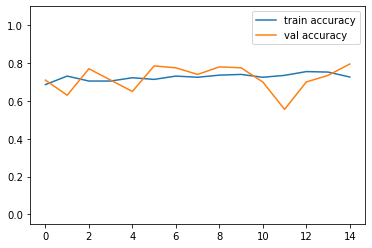

1/1 [==============================] - 0s 33ms/step


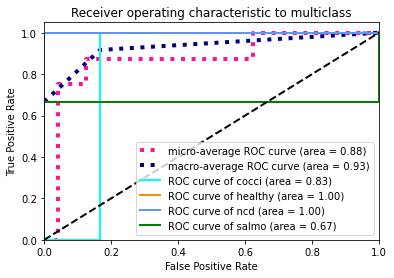

In [76]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet50_15.h5')

In [77]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
100/100 [==============================] - 36s 359ms/step - loss: 0.6889 - accuracy: 0.7437 - val_loss: 0.7518 - val_accuracy: 0.6600
Epoch 2/20
100/100 [==============================] - 34s 344ms/step - loss: 0.6700 - accuracy: 0.7312 - val_loss: 0.7889 - val_accuracy: 0.6750
Epoch 3/20
100/100 [==============================] - 35s 347ms/step - loss: 0.6636 - accuracy: 0.7513 - val_loss: 0.8756 - val_accuracy: 0.6400
Epoch 4/20
100/100 [==============================] - 35s 348ms/step - loss: 0.6522 - accuracy: 0.7550 - val_loss: 0.6318 - val_accuracy: 0.7400
Epoch 5/20
100/100 [==============================] - 34s 344ms/step - loss: 0.6400 - accuracy: 0.7613 - val_loss: 0.8193 - val_accuracy: 0.6800
Epoch 6/20
100/100 [==============================] - 35s 346ms/step - loss: 0.6529 - accuracy: 0.7412 - val_loss: 0.6475 - val_accuracy: 0.7850
Epoch 7/20
100/100 [==============================] - 34s 345ms/step - loss: 0.6459 - accuracy: 0.7425 - val_loss: 0.7226 - val_ac

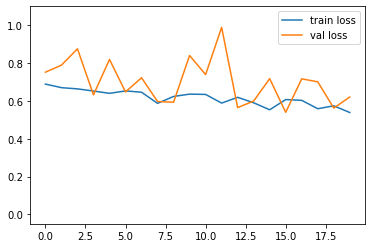

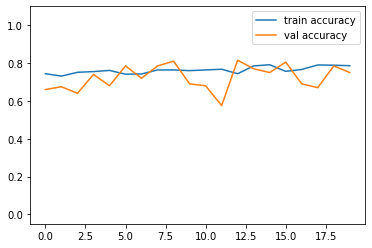

1/1 [==============================] - 0s 28ms/step


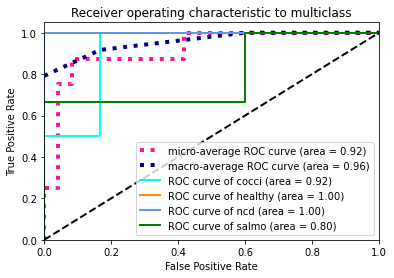

In [78]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet50_20.h5')

In [79]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
100/100 [==============================] - 36s 360ms/step - loss: 0.5484 - accuracy: 0.7937 - val_loss: 0.7870 - val_accuracy: 0.6600
Epoch 2/25
100/100 [==============================] - 35s 352ms/step - loss: 0.6518 - accuracy: 0.7400 - val_loss: 1.0238 - val_accuracy: 0.6300
Epoch 3/25
100/100 [==============================] - 35s 352ms/step - loss: 0.5862 - accuracy: 0.7812 - val_loss: 0.6774 - val_accuracy: 0.7650
Epoch 4/25
100/100 [==============================] - 35s 350ms/step - loss: 0.5889 - accuracy: 0.7700 - val_loss: 0.4977 - val_accuracy: 0.8100
Epoch 5/25
100/100 [==============================] - 34s 344ms/step - loss: 0.6019 - accuracy: 0.7663 - val_loss: 0.6445 - val_accuracy: 0.7500
Epoch 6/25
100/100 [==============================] - 35s 346ms/step - loss: 0.5709 - accuracy: 0.7875 - val_loss: 0.7492 - val_accuracy: 0.7350
Epoch 7/25
100/100 [==============================] - 35s 346ms/step - loss: 0.5461 - accuracy: 0.8075 - val_loss: 0.6659 - val_ac

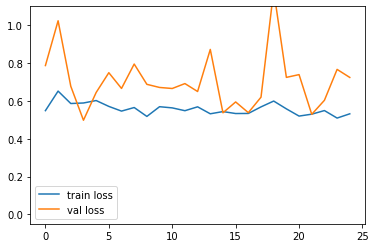

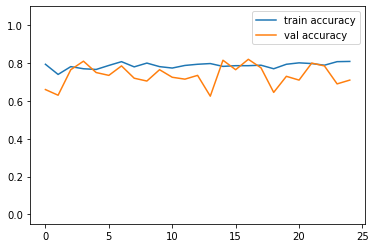

1/1 [==============================] - 0s 29ms/step


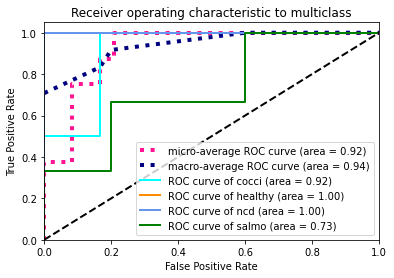

In [80]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet50_25.h5')

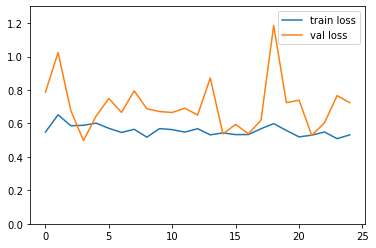

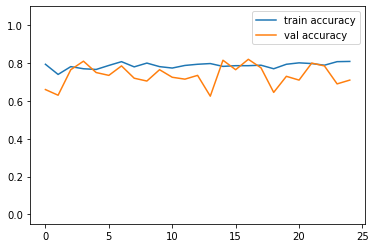

In [82]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylim(0.0, 1.3)
plt.show()

    # plotting the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.ylim(-0.05, 1.1)
plt.show()


In [83]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
100/100 [==============================] - 36s 354ms/step - loss: 0.5083 - accuracy: 0.8125 - val_loss: 0.6149 - val_accuracy: 0.7800
Epoch 2/30
100/100 [==============================] - 35s 350ms/step - loss: 0.4843 - accuracy: 0.8263 - val_loss: 0.4948 - val_accuracy: 0.8250
Epoch 3/30
100/100 [==============================] - 35s 350ms/step - loss: 0.5268 - accuracy: 0.8012 - val_loss: 0.7043 - val_accuracy: 0.7550
Epoch 4/30
100/100 [==============================] - 35s 350ms/step - loss: 0.5247 - accuracy: 0.8037 - val_loss: 0.6743 - val_accuracy: 0.7650
Epoch 5/30
100/100 [==============================] - 35s 352ms/step - loss: 0.4911 - accuracy: 0.8138 - val_loss: 0.7895 - val_accuracy: 0.6900
Epoch 6/30
100/100 [==============================] - 34s 338ms/step - loss: 0.5163 - accuracy: 0.8125 - val_loss: 0.5637 - val_accuracy: 0.8300
Epoch 7/30
100/100 [==============================] - 34s 337ms/step - loss: 0.5014 - accuracy: 0.8213 - val_loss: 0.5746 - val_ac

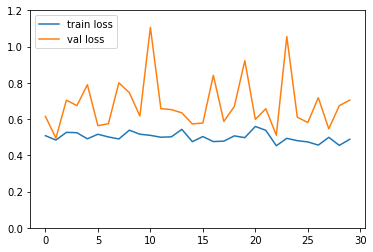

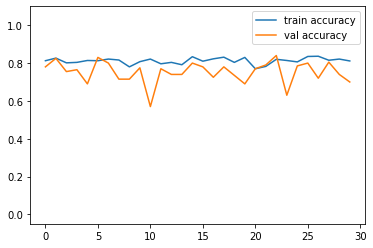

1/1 [==============================] - 0s 32ms/step


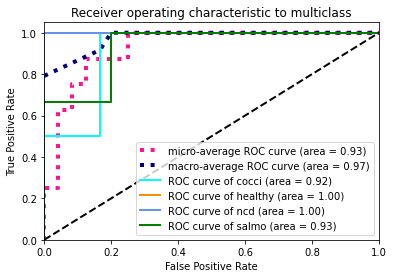

In [84]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylim(0.0, 1.2)
plt.show()

    # plotting the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.ylim(-0.05, 1.1)
plt.show()


plot_roc_curve()
model.save('./models/resnet50_30.h5')

In [85]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/35
100/100 [==============================] - 36s 358ms/step - loss: 0.4783 - accuracy: 0.8200 - val_loss: 0.5146 - val_accuracy: 0.8100
Epoch 2/35
100/100 [==============================] - 35s 352ms/step - loss: 0.4647 - accuracy: 0.8125 - val_loss: 0.7842 - val_accuracy: 0.7100
Epoch 3/35
100/100 [==============================] - 35s 352ms/step - loss: 0.4676 - accuracy: 0.8238 - val_loss: 0.6835 - val_accuracy: 0.7200
Epoch 4/35
100/100 [==============================] - 35s 354ms/step - loss: 0.4517 - accuracy: 0.8250 - val_loss: 0.5643 - val_accuracy: 0.7550
Epoch 5/35
100/100 [==============================] - 36s 357ms/step - loss: 0.4961 - accuracy: 0.8112 - val_loss: 0.6289 - val_accuracy: 0.7550
Epoch 6/35
100/100 [==============================] - 35s 352ms/step - loss: 0.4502 - accuracy: 0.8213 - val_loss: 0.7230 - val_accuracy: 0.7600
Epoch 7/35
100/100 [==============================] - 35s 352ms/step - loss: 0.4816 - accuracy: 0.8138 - val_loss: 0.5049 - val_ac

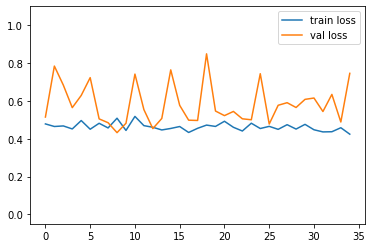

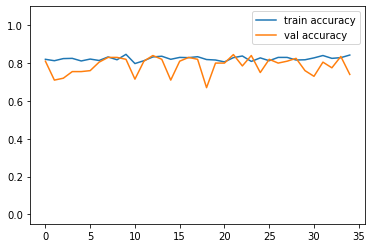

1/1 [==============================] - 0s 32ms/step


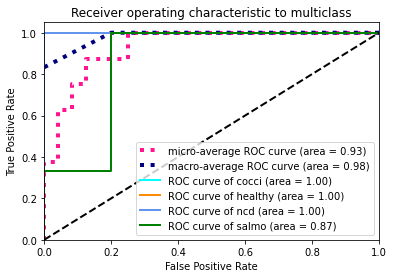

In [86]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet50_35.h5')

In [87]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/40
100/100 [==============================] - 37s 364ms/step - loss: 0.4268 - accuracy: 0.8350 - val_loss: 0.4739 - val_accuracy: 0.8400
Epoch 2/40
100/100 [==============================] - 36s 365ms/step - loss: 0.4411 - accuracy: 0.8350 - val_loss: 0.5147 - val_accuracy: 0.8150
Epoch 3/40
100/100 [==============================] - 36s 365ms/step - loss: 0.4261 - accuracy: 0.8450 - val_loss: 0.4532 - val_accuracy: 0.8400
Epoch 4/40
100/100 [==============================] - 36s 362ms/step - loss: 0.4365 - accuracy: 0.8400 - val_loss: 0.4774 - val_accuracy: 0.8450
Epoch 5/40
100/100 [==============================] - 36s 358ms/step - loss: 0.4038 - accuracy: 0.8562 - val_loss: 0.7557 - val_accuracy: 0.7250
Epoch 6/40
100/100 [==============================] - 36s 359ms/step - loss: 0.4214 - accuracy: 0.8438 - val_loss: 0.5983 - val_accuracy: 0.7750
Epoch 7/40
100/100 [==============================] - 36s 357ms/step - loss: 0.4326 - accuracy: 0.8250 - val_loss: 0.5826 - val_ac

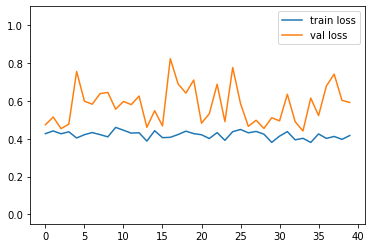

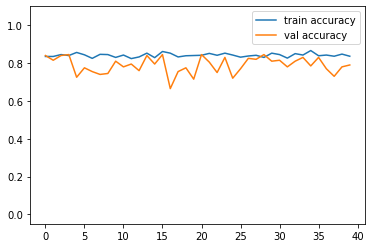

1/1 [==============================] - 0s 30ms/step


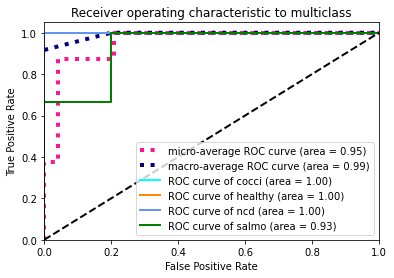

In [88]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet50_40.h5')

In [89]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=45,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/45
100/100 [==============================] - 36s 359ms/step - loss: 0.3920 - accuracy: 0.8550 - val_loss: 0.4711 - val_accuracy: 0.8150
Epoch 2/45
100/100 [==============================] - 36s 358ms/step - loss: 0.4185 - accuracy: 0.8537 - val_loss: 0.5900 - val_accuracy: 0.8000
Epoch 3/45
100/100 [==============================] - 36s 354ms/step - loss: 0.3724 - accuracy: 0.8625 - val_loss: 0.4966 - val_accuracy: 0.8300
Epoch 4/45
100/100 [==============================] - 36s 356ms/step - loss: 0.4325 - accuracy: 0.8450 - val_loss: 0.5336 - val_accuracy: 0.8150
Epoch 5/45
100/100 [==============================] - 36s 358ms/step - loss: 0.3890 - accuracy: 0.8600 - val_loss: 0.4766 - val_accuracy: 0.8300
Epoch 6/45
100/100 [==============================] - 36s 356ms/step - loss: 0.4211 - accuracy: 0.8512 - val_loss: 0.6125 - val_accuracy: 0.7850
Epoch 7/45
100/100 [==============================] - 36s 359ms/step - loss: 0.3618 - accuracy: 0.8612 - val_loss: 0.5265 - val_ac

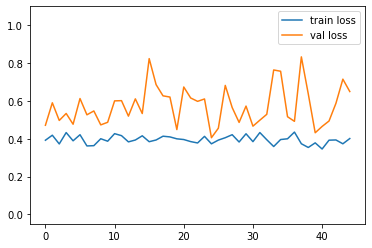

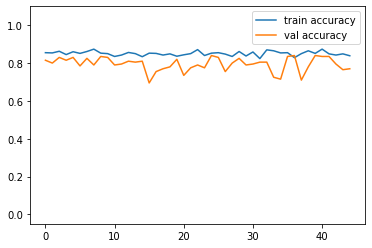

1/1 [==============================] - 0s 30ms/step


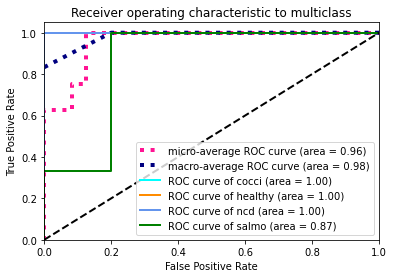

In [90]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet50_45.h5')

In [91]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
100/100 [==============================] - 36s 354ms/step - loss: 0.3742 - accuracy: 0.8525 - val_loss: 0.4801 - val_accuracy: 0.8300
Epoch 2/50
100/100 [==============================] - 35s 351ms/step - loss: 0.3772 - accuracy: 0.8612 - val_loss: 0.5881 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 35s 352ms/step - loss: 0.3828 - accuracy: 0.8425 - val_loss: 0.5893 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 35s 353ms/step - loss: 0.3598 - accuracy: 0.8625 - val_loss: 0.6556 - val_accuracy: 0.7500
Epoch 5/50
100/100 [==============================] - 35s 350ms/step - loss: 0.3988 - accuracy: 0.8438 - val_loss: 0.3908 - val_accuracy: 0.8550
Epoch 6/50
100/100 [==============================] - 35s 351ms/step - loss: 0.3412 - accuracy: 0.8775 - val_loss: 0.4618 - val_accuracy: 0.8350
Epoch 7/50
100/100 [==============================] - 35s 351ms/step - loss: 0.4042 - accuracy: 0.8350 - val_loss: 0.5617 - val_ac

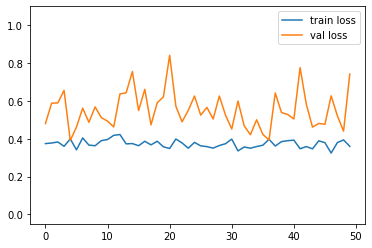

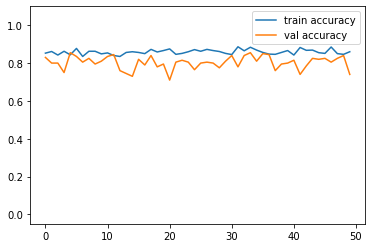

1/1 [==============================] - 0s 29ms/step


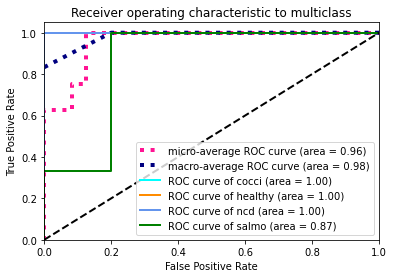

In [92]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet50_50.h5')

In [93]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=60,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/60
100/100 [==============================] - 34s 341ms/step - loss: 0.3430 - accuracy: 0.8625 - val_loss: 0.4341 - val_accuracy: 0.8600
Epoch 2/60
100/100 [==============================] - 34s 344ms/step - loss: 0.3741 - accuracy: 0.8612 - val_loss: 0.5279 - val_accuracy: 0.8150
Epoch 3/60
100/100 [==============================] - 35s 347ms/step - loss: 0.3956 - accuracy: 0.8400 - val_loss: 0.4025 - val_accuracy: 0.8450
Epoch 4/60
100/100 [==============================] - 35s 354ms/step - loss: 0.3517 - accuracy: 0.8625 - val_loss: 0.3938 - val_accuracy: 0.8450
Epoch 5/60
100/100 [==============================] - 34s 341ms/step - loss: 0.3586 - accuracy: 0.8587 - val_loss: 0.7548 - val_accuracy: 0.7050
Epoch 6/60
100/100 [==============================] - 34s 336ms/step - loss: 0.3547 - accuracy: 0.8712 - val_loss: 0.5358 - val_accuracy: 0.8100
Epoch 7/60
100/100 [==============================] - 34s 336ms/step - loss: 0.3232 - accuracy: 0.8825 - val_loss: 0.4644 - val_ac

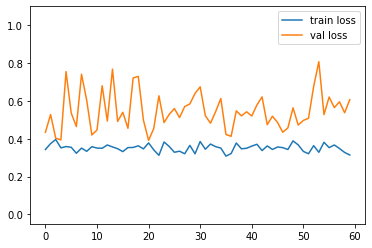

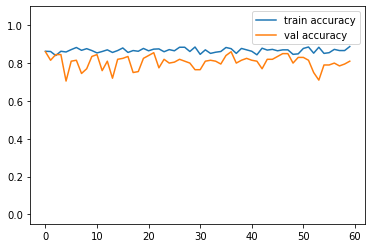

1/1 [==============================] - 0s 30ms/step


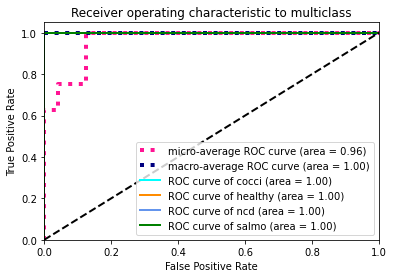

In [94]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet50_60.h5')

In [95]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=70,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/70
100/100 [==============================] - 35s 345ms/step - loss: 0.3520 - accuracy: 0.8737 - val_loss: 0.4254 - val_accuracy: 0.8550
Epoch 2/70
100/100 [==============================] - 34s 339ms/step - loss: 0.3560 - accuracy: 0.8763 - val_loss: 0.5511 - val_accuracy: 0.7900
Epoch 3/70
100/100 [==============================] - 34s 337ms/step - loss: 0.3270 - accuracy: 0.8725 - val_loss: 0.4213 - val_accuracy: 0.8450
Epoch 4/70
100/100 [==============================] - 35s 347ms/step - loss: 0.3248 - accuracy: 0.8788 - val_loss: 0.5750 - val_accuracy: 0.8100
Epoch 5/70
100/100 [==============================] - 35s 349ms/step - loss: 0.3586 - accuracy: 0.8512 - val_loss: 0.5675 - val_accuracy: 0.7850
Epoch 6/70
100/100 [==============================] - 34s 338ms/step - loss: 0.3023 - accuracy: 0.8850 - val_loss: 0.5920 - val_accuracy: 0.7900
Epoch 7/70
100/100 [==============================] - 34s 338ms/step - loss: 0.3283 - accuracy: 0.8788 - val_loss: 0.7310 - val_ac

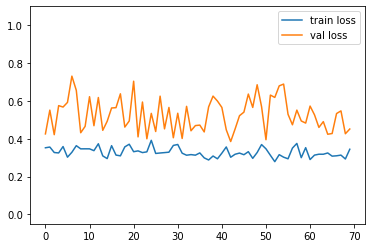

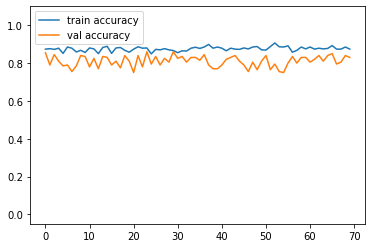

1/1 [==============================] - 0s 30ms/step


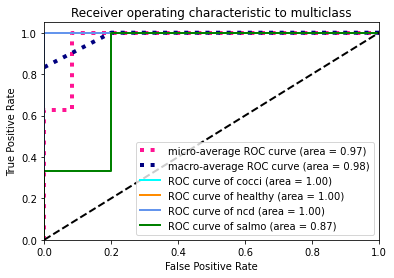

In [96]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet50_70.h5')

In [97]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=80,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/80
100/100 [==============================] - 37s 364ms/step - loss: 0.3131 - accuracy: 0.8825 - val_loss: 0.5571 - val_accuracy: 0.8050
Epoch 2/80
100/100 [==============================] - 37s 367ms/step - loss: 0.3005 - accuracy: 0.8900 - val_loss: 0.4280 - val_accuracy: 0.8300
Epoch 3/80
100/100 [==============================] - 37s 366ms/step - loss: 0.3204 - accuracy: 0.8737 - val_loss: 0.4142 - val_accuracy: 0.8500
Epoch 4/80
100/100 [==============================] - 37s 368ms/step - loss: 0.3280 - accuracy: 0.8725 - val_loss: 0.5746 - val_accuracy: 0.7900
Epoch 5/80
100/100 [==============================] - 36s 360ms/step - loss: 0.3179 - accuracy: 0.8750 - val_loss: 0.5677 - val_accuracy: 0.8150
Epoch 6/80
100/100 [==============================] - 36s 361ms/step - loss: 0.3022 - accuracy: 0.8813 - val_loss: 0.4803 - val_accuracy: 0.8100
Epoch 7/80
100/100 [==============================] - 37s 364ms/step - loss: 0.3285 - accuracy: 0.8800 - val_loss: 0.5013 - val_ac

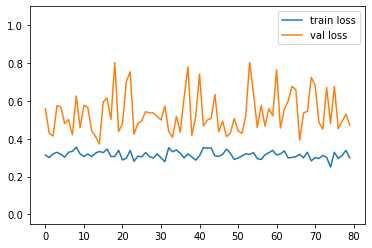

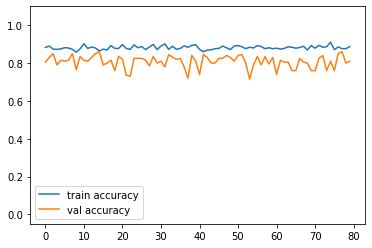

1/1 [==============================] - 0s 46ms/step


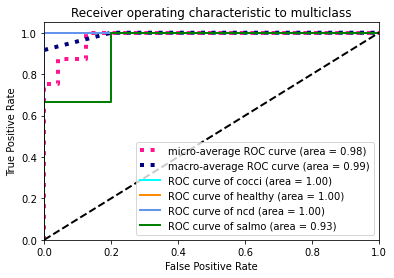

In [98]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet50_80.h5')

In [99]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=90,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/90
100/100 [==============================] - 35s 350ms/step - loss: 0.2676 - accuracy: 0.9050 - val_loss: 0.4886 - val_accuracy: 0.8100
Epoch 2/90
100/100 [==============================] - 34s 337ms/step - loss: 0.2917 - accuracy: 0.8975 - val_loss: 0.5987 - val_accuracy: 0.7800
Epoch 3/90
100/100 [==============================] - 34s 339ms/step - loss: 0.2627 - accuracy: 0.9175 - val_loss: 0.4270 - val_accuracy: 0.8400
Epoch 4/90
100/100 [==============================] - 34s 340ms/step - loss: 0.3349 - accuracy: 0.8675 - val_loss: 0.4427 - val_accuracy: 0.8700
Epoch 5/90
100/100 [==============================] - 34s 337ms/step - loss: 0.3346 - accuracy: 0.8612 - val_loss: 0.6435 - val_accuracy: 0.7600
Epoch 6/90
100/100 [==============================] - 34s 340ms/step - loss: 0.3502 - accuracy: 0.8650 - val_loss: 0.5804 - val_accuracy: 0.7750
Epoch 7/90
100/100 [==============================] - 34s 339ms/step - loss: 0.3264 - accuracy: 0.8712 - val_loss: 0.6168 - val_ac

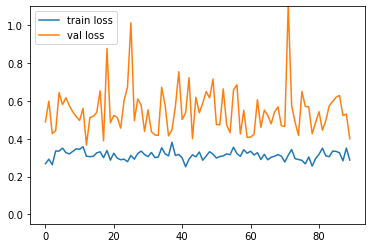

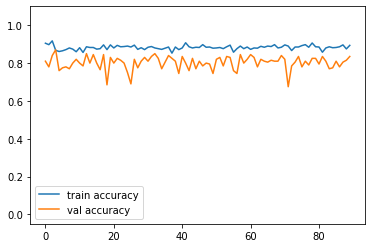

1/1 [==============================] - 0s 30ms/step


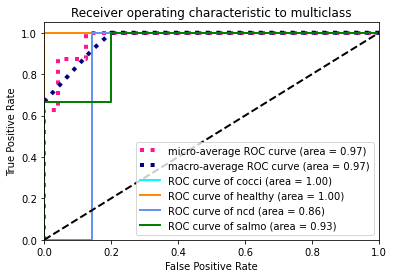

In [100]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet50_90.h5')

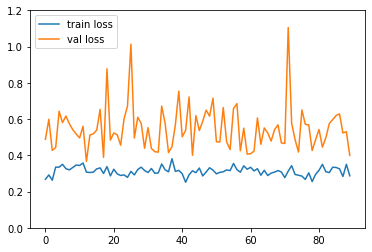

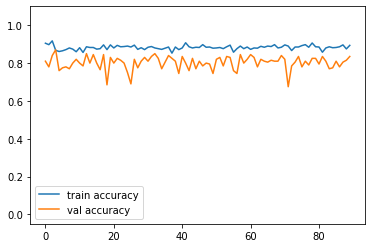

In [101]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylim(0.0, 1.2)
plt.show()

    # plotting the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.ylim(-0.05, 1.1)
plt.show()

In [102]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/100
100/100 [==============================] - 35s 351ms/step - loss: 0.2935 - accuracy: 0.9025 - val_loss: 0.5483 - val_accuracy: 0.8050
Epoch 2/100
100/100 [==============================] - 34s 340ms/step - loss: 0.3091 - accuracy: 0.8813 - val_loss: 0.4652 - val_accuracy: 0.8450
Epoch 3/100
100/100 [==============================] - 34s 339ms/step - loss: 0.3038 - accuracy: 0.8675 - val_loss: 0.5268 - val_accuracy: 0.8050
Epoch 4/100
100/100 [==============================] - 34s 340ms/step - loss: 0.3176 - accuracy: 0.8788 - val_loss: 0.6123 - val_accuracy: 0.7700
Epoch 5/100
100/100 [==============================] - 34s 337ms/step - loss: 0.3114 - accuracy: 0.8838 - val_loss: 0.4642 - val_accuracy: 0.8400
Epoch 6/100
100/100 [==============================] - 34s 338ms/step - loss: 0.3256 - accuracy: 0.8750 - val_loss: 0.4321 - val_accuracy: 0.8300
Epoch 7/100
100/100 [==============================] - 34s 337ms/step - loss: 0.2922 - accuracy: 0.8900 - val_loss: 0.3986 -

Epoch 57/100
100/100 [==============================] - 34s 338ms/step - loss: 0.2966 - accuracy: 0.8813 - val_loss: 0.5088 - val_accuracy: 0.8100
Epoch 58/100
100/100 [==============================] - 34s 338ms/step - loss: 0.2780 - accuracy: 0.8900 - val_loss: 0.4835 - val_accuracy: 0.8200
Epoch 59/100
100/100 [==============================] - 34s 337ms/step - loss: 0.2992 - accuracy: 0.8838 - val_loss: 0.5347 - val_accuracy: 0.8250
Epoch 60/100
100/100 [==============================] - 34s 336ms/step - loss: 0.2602 - accuracy: 0.9038 - val_loss: 0.6069 - val_accuracy: 0.7850
Epoch 61/100
100/100 [==============================] - 34s 337ms/step - loss: 0.2836 - accuracy: 0.8863 - val_loss: 0.4492 - val_accuracy: 0.8200
Epoch 62/100
100/100 [==============================] - 34s 338ms/step - loss: 0.2978 - accuracy: 0.8850 - val_loss: 0.6330 - val_accuracy: 0.7900
Epoch 63/100
100/100 [==============================] - 34s 336ms/step - loss: 0.2774 - accuracy: 0.8938 - val_loss: 0

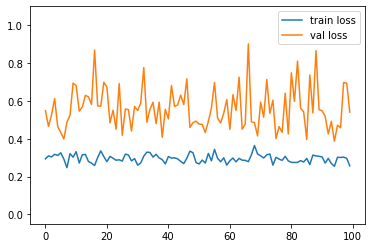

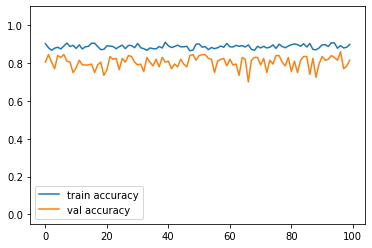

1/1 [==============================] - 0s 29ms/step


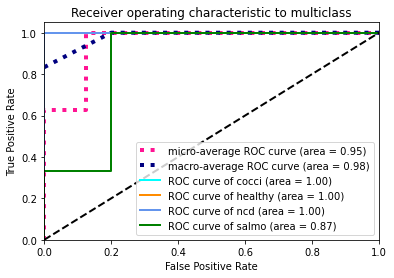

In [103]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet50_100.h5')

In [109]:
path = 'D:/MScCS/thesis/Dataset/new/separate testing/salmo/'
count = 0
for i in os.listdir(path):
    filename = path + i
    Image(filename,width=224,height=224)
    img = image.load_img(filename,target_size=(224, 224))

    resizedimg = image.img_to_array(img)
    finalimg = np.expand_dims(resizedimg,axis=0)
    finalimg = tf.keras.applications.resnet50.preprocess_input(finalimg)
    finalimg.shape
    predictions = model.predict(finalimg)

    #print(np.argmax(predictions))
    category = np.argmax(predictions)
    if(category == 3):
        count = count + 1
        
print('Total accurate prediction for cocci:', count)

1/1 [==============================] - 0s 21ms/step
Total accurate prediction for cocci: 19


In [ ]:
#epoch 90 - 36